In [2]:
import pandas as pd

data = pd.read_csv(r'C:\Users\Samul\Downloads\archive\olympic_results.csv')
print(data.head())
print(data.info())

# Tarkistetaan, onko medal_type-sarake olemassa
if 'medal_type' in data.columns:
    # Tarkistetaan, kuinka monta NaN-arvoa on medal_type-sarakkeessa
    print(data['medal_type'].isna().sum())

    # Poistetaan NaN-arvot medal_type-sarakkeesta
    medal_data = data.dropna(subset=['medal_type'])

    # Ryhmitellään maat ja lasketaan mitaleita
    medal_counts = medal_data.groupby('country_3_letter_code').size().sort_values(ascending=False)

    print("Eniten mitaleja voittaneet maat:")
    print(medal_counts.head())
else:
    print("medal_type-saraketta ei löydy datasta.")


  discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_

In [4]:
# Ryhmitellään ja lasketaan kullat, hopeat ja pronssit maittain
medal_counts_by_type = medal_data.groupby(['country_3_letter_code', 'medal_type']).size().unstack(fill_value=0)

print("Mitalit maittain ja tyypeittäin:")
print(medal_counts_by_type)

# Jos haluat tarkastella eniten kultamitaleja voittaneita maita:
print("\nEniten kultamitaleja voittaneet maat:")
print(medal_counts_by_type['GOLD'].sort_values(ascending=False).head())


Mitalit maittain ja tyypeittäin:
medal_type             BRONZE  GOLD  SILVER
country_3_letter_code                      
AFG                         2     0       0
AHO                         0     0       1
ALG                         8     5       4
ANZ                         5     3       4
ARG                        30    21      26
...                       ...   ...     ...
VIE                         0     1       3
WIF                         2     0       0
YUG                        29    26      32
ZAM                         1     0       1
ZIM                         1     3       4

[154 rows x 3 columns]

Eniten kultamitaleja voittaneet maat:
country_3_letter_code
USA    1171
URS     473
GER     337
GBR     294
CHN     284
Name: GOLD, dtype: int64


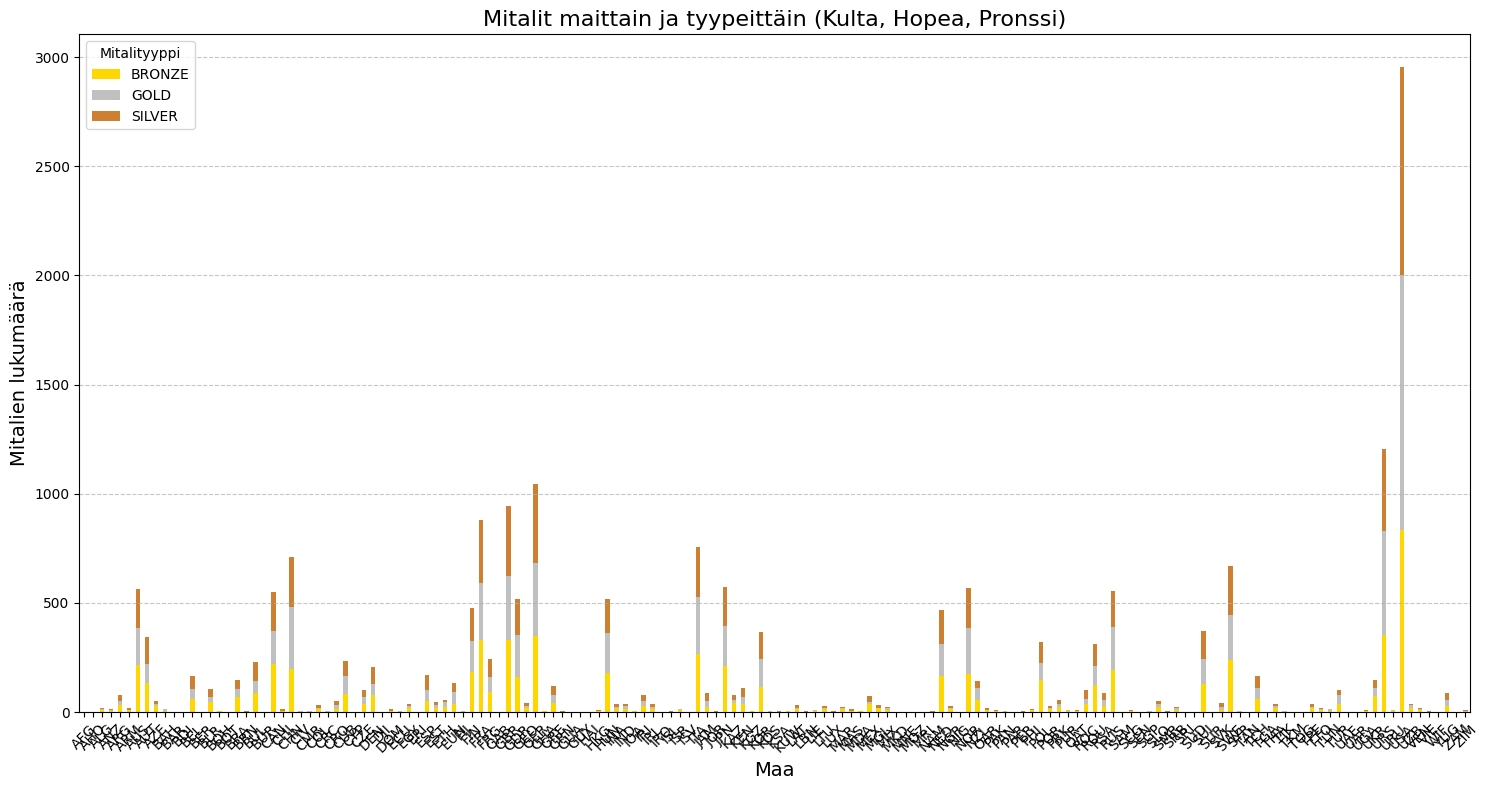

In [7]:
import matplotlib.pyplot as plt

# Piirretään pylväskaavio mitalityypeittäin
medal_counts_by_type.plot(kind='bar', stacked=True, figsize=(15, 8), color=['gold', 'silver', '#cd7f32'])

plt.title('Mitalit maittain ja tyypeittäin (Kulta, Hopea, Pronssi)', fontsize=16)
plt.xlabel('Maa', fontsize=14)
plt.ylabel('Mitalien lukumäärä', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Mitalityyppi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()  # Estää leikkaantumisen
plt.show()


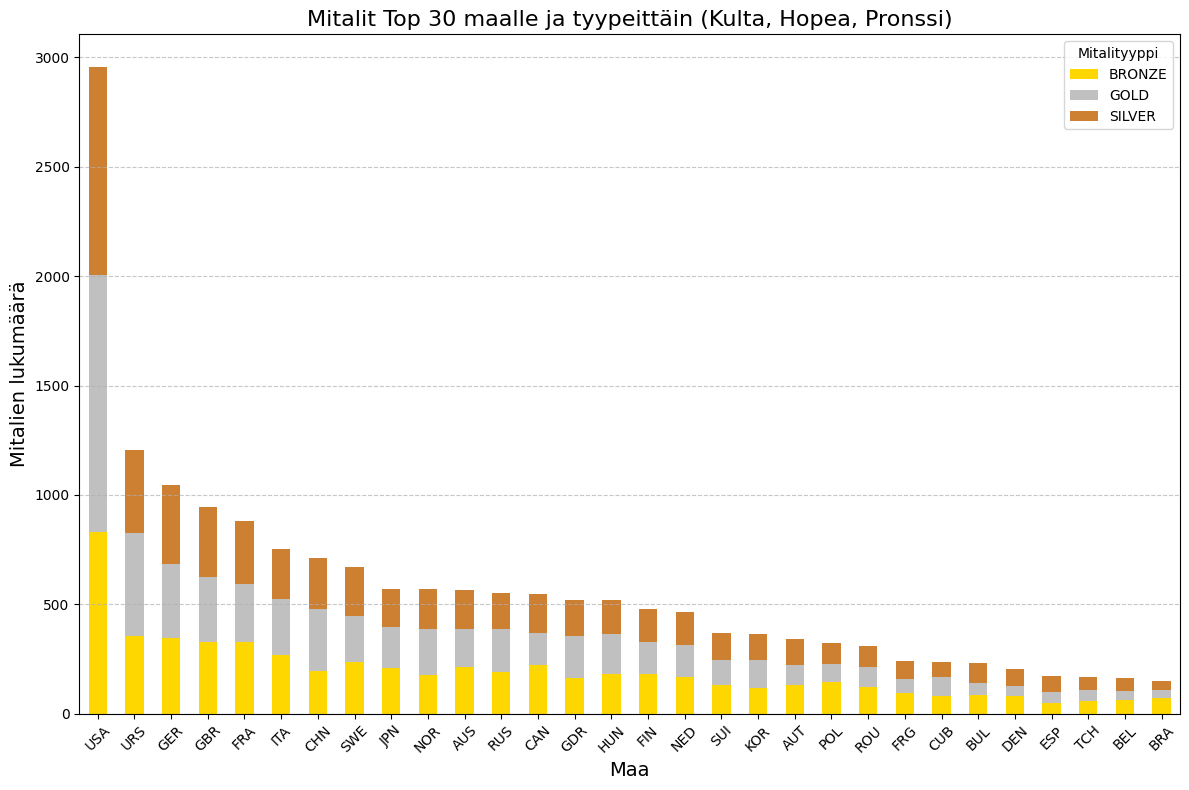

In [16]:
import matplotlib.pyplot as plt

# Valitaan Top 15 maata kokonaismitalien määrän perusteella
top_countries = medal_counts_by_type.sum(axis=1).sort_values(ascending=False).head(30)

# Suodatetaan dataa näiden maiden perusteella
filtered_data = medal_counts_by_type.loc[top_countries.index]

# Piirretään pylväskaavio mitalityypeittäin vain Top 15 maalle
filtered_data.plot(kind='bar', stacked=True, figsize=(12, 8), color=['gold', 'silver', '#cd7f32'])

plt.title('Mitalit Top 30 maalle ja tyypeittäin (Kulta, Hopea, Pronssi)', fontsize=16)
plt.xlabel('Maa', fontsize=14)
plt.ylabel('Mitalien lukumäärä', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Mitalityyppi')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [12]:
import pandas as pd

# Ladataan data
data = pd.read_csv('C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Tarkastellaan ensimmäisiä rivejä
print(data.head())

# Tarkistetaan sarakkeiden nimet
print(data.columns)


  discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_

In [ ]:
import pandas as pd

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_hosts.csv')

# Suodatetaan vain vuodet 1896 eteenpäin
modern_olympics = data[data['game_year'] >= 1896]

print(modern_olympics)
# perse

                      game_slug         game_end_date       game_start_date  \
0                  beijing-2022  2022-02-20T12:00:00Z  2022-02-04T15:00:00Z   
1                    tokyo-2020  2021-08-08T14:00:00Z  2021-07-23T11:00:00Z   
2              pyeongchang-2018  2018-02-25T08:00:00Z  2018-02-08T23:00:00Z   
3                      rio-2016  2016-08-21T21:00:00Z  2016-08-05T12:00:00Z   
4                    sochi-2014  2014-02-23T16:00:00Z  2014-02-07T04:00:00Z   
5                   london-2012  2012-08-12T19:00:00Z  2012-07-27T07:00:00Z   
6                vancouver-2010  2010-02-28T04:00:00Z  2010-02-12T16:00:00Z   
7                  beijing-2008  2008-08-24T12:00:00Z  2008-08-08T00:00:00Z   
8                    turin-2006  2006-02-26T19:00:00Z  2006-02-10T07:00:00Z   
9                   athens-2004  2004-08-29T18:00:00Z  2004-08-13T06:00:00Z   
10          salt-lake-city-2002  2002-02-24T08:00:00Z  2002-02-08T15:00:00Z   
11                  sydney-2000  2000-10-01T09:00:00

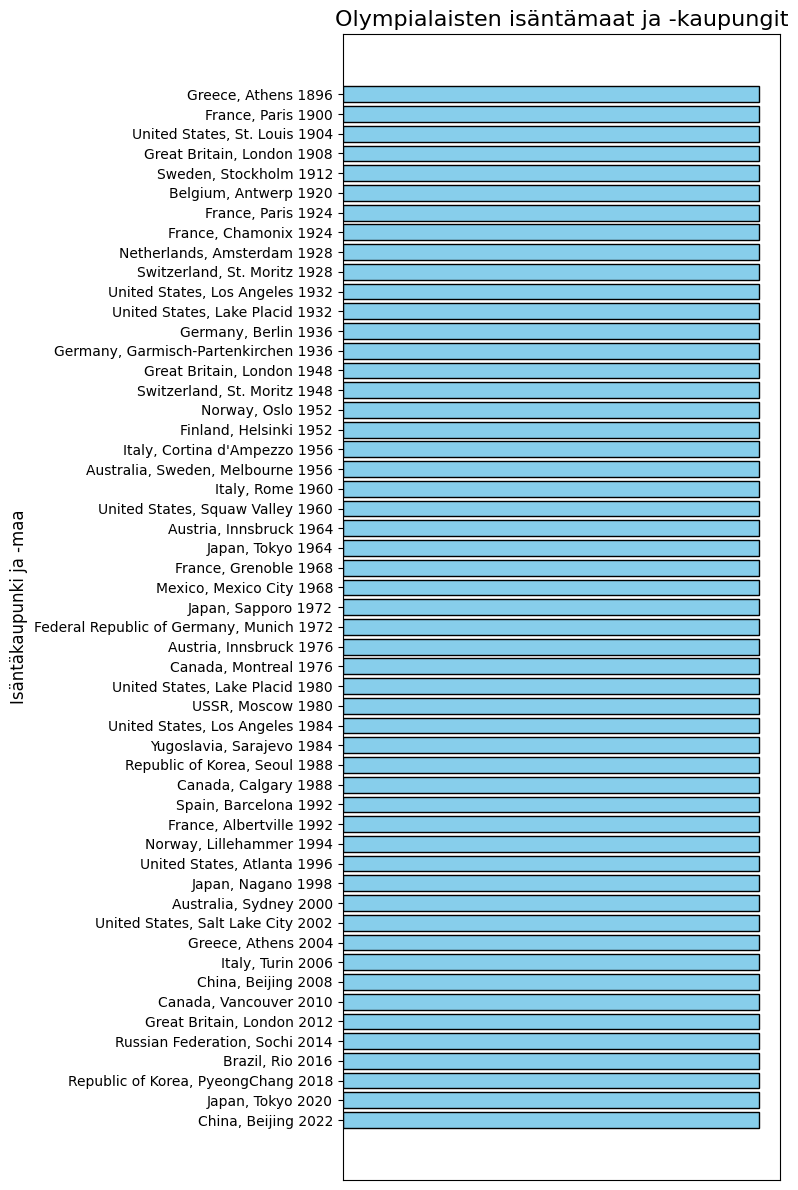

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_hosts.csv')

# Suodatetaan vain vuodet 1896 eteenpäin
modern_olympics = data[data['game_year'] >= 1896]

# Yhdistetään isäntämaa ja -kaupunki yhdeksi sarakkeeksi
modern_olympics['host'] = modern_olympics['game_location'] + ', ' + modern_olympics['game_name']

# Järjestetään tiedot vuoden mukaan
modern_olympics = modern_olympics.sort_values(by='game_year')

# Luodaan kuvaaja vain isäntäkaupungeista
plt.figure(figsize=(8, 12))
plt.barh(modern_olympics['host'], [1] * len(modern_olympics), color='skyblue', edgecolor='black')

# Piilotetaan x-akseli (arvot ja viivat)
plt.gca().axes.get_xaxis().set_visible(False)

# Asetetaan otsikot
plt.title('Olympialaisten isäntämaat ja -kaupungit', fontsize=16)
plt.ylabel('Isäntäkaupunki ja -maa', fontsize=12)

# Käännetään y-akselin kaavion järjestys
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()


In [32]:
import pandas as pd

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

print(data.head())



  discipline_title    event_title     slug_game participant_type medal_type  \
0          Curling  Mixed Doubles  beijing-2022         GameTeam       GOLD   
1          Curling  Mixed Doubles  beijing-2022         GameTeam     SILVER   
2          Curling  Mixed Doubles  beijing-2022         GameTeam     BRONZE   
3          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   
4          Curling  Mixed Doubles  beijing-2022         GameTeam        NaN   

                                            athletes rank_equal rank_position  \
0  [('Stefania CONSTANTINI', 'https://olympics.co...      False             1   
1  [('Kristin SKASLIEN', 'https://olympics.com/en...      False             2   
2  [('Almida DE VAL', 'https://olympics.com/en/at...      False             3   
3  [('Jennifer DODDS', 'https://olympics.com/en/a...      False             4   
4  [('Rachel HOMAN', 'https://olympics.com/en/ath...      False             5   

    country_name country_code country_

In [34]:
import pandas as pd

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Tarkistetaan, että sarakkeet sisältävät tiedon urheilijan nimestä ja mitaleista
print(data.columns)

# Suodatetaan vain mitalit (oletetaan, että mitalit ovat sarakkeessa 'medal_type')
if 'medal_type' in data.columns and 'athlete_name' in data.columns:
    # Lasketaan mitalit urheilijan nimen perusteella
    medal_counts = data.groupby('athlete_name')['medal_type'].count()

    # Järjestetään laskevasti ja näytetään top 10
    top_medalists = medal_counts.sort_values(ascending=False).head(10)

    print("Eniten mitaleja voittaneet urheilijat:")
    print(top_medalists)
else:
    print("Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_name'.")


Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')
Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_name'.


In [40]:
import pandas as pd

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Tarkistetaan, että sarakkeet sisältävät tiedon urheilijan nimestä ja mitaleista
print(data.columns)

# Suodatetaan vain mitalit
if 'medal_type' in data.columns and 'athlete_full_name' in data.columns:
    # Poistetaan rivit, joissa ei ole mitalia (NaN)
    medal_data = data.dropna(subset=['medal_type'])
    
    # Suodatetaan vain kultamitaleja, hopeamitaleja ja pronssimitaleja
    medal_data = medal_data[medal_data['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]
    
    # Katsotaan, onko Phelps mukana
    phelps_data = medal_data[medal_data['athlete_full_name'] == 'Michael PHELPS']
    print("Michael Phelpsin mitalit:")
    print(phelps_data)

    # Poistetaan duplikaatit samasta tapahtumasta
    medal_data = medal_data.drop_duplicates(subset=['athlete_full_name', 'medal_type', 'event_title'])

    # Lasketaan mitalit urheilijan nimen perusteella
    medal_counts = medal_data.groupby('athlete_full_name')['medal_type'].count()

    # Järjestetään laskevasti ja näytetään top 10
    top_medalists = medal_counts.sort_values(ascending=False).head(10)

    print("Eniten mitaleja voittaneet urheilijat:")
    print(top_medalists)
else:
    print("Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_full_name'.")


Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')
Michael Phelpsin mitalit:
      discipline_title                 event_title     slug_game  \
20512         Swimming  200m individual medley men      rio-2016   
20861         Swimming          200m butterfly men      rio-2016   
21272         Swimming          100m butterfly men      rio-2016   
25737         Swimming          100m butterfly men   london-2012   
26273         Swimming  200m individual medley men   london-2012   
26645         Swimming          200m butterfly men   london-2012   
42289         Swimming  200m individual medley men  beijing-2008   
42564         Swimming          100m butterfly men  beijing-2008   
43189         Swimming          200m butterfly men  beijing-2008 

Index(['discipline_title', 'event_title', 'slug_game', 'participant_type',
       'medal_type', 'athletes', 'rank_equal', 'rank_position', 'country_name',
       'country_code', 'country_3_letter_code', 'athlete_url',
       'athlete_full_name', 'value_unit', 'value_type'],
      dtype='object')
Eniten mitaleja voittaneet urheilijat:
medal_type                 GOLD  SILVER  BRONZE  total
athlete_full_name                                     
Larisa LATYNINA               3       4       3     10
Nikolay ANDRIANOV             4       3       3     10
Marit BJOERGEN                5       3       2     10
Ireen WÜST                    4       4       1      9
Alexei NEMOV                  3       2       4      9
Boris SHAKHLIN                5       2       2      9
Vitaly SCHERBO                5       0       4      9
Aleksandr DITYATIN            2       5       1      8
Karin ENKE                    3       4       1      8
Viktor Ivanovich CHUKARIN     4       3       1      8


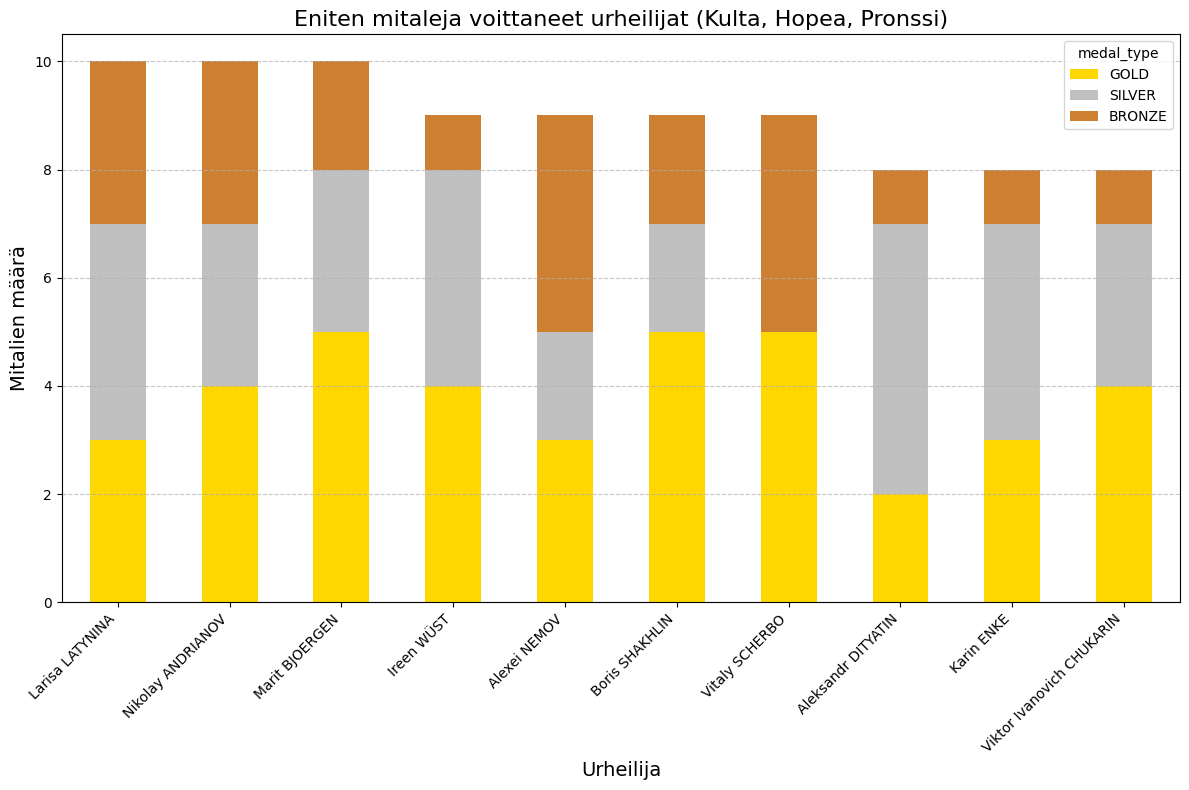

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Tarkistetaan, että sarakkeet sisältävät tiedon urheilijan nimestä ja mitaleista
print(data.columns)

# Suodatetaan vain mitalit (kulta, hopea, pronssi)
if 'medal_type' in data.columns and 'athlete_full_name' in data.columns:
    # Poistetaan rivit, joissa ei ole mitalia (NaN)
    medal_data = data.dropna(subset=['medal_type'])
    
    # Suodatetaan vain kultamitaleja, hopeamitaleja ja pronssimitaleja
    medal_data = medal_data[medal_data['medal_type'].isin(['GOLD', 'SILVER', 'BRONZE'])]
    
    # Poistetaan duplikaatit samasta tapahtumasta vain, mutta ei urheilijalta kokonaan
    medal_data = medal_data.drop_duplicates(subset=['athlete_full_name', 'medal_type', 'event_title'])

    # Lasketaan mitalit kullekin urheilijalle erikseen
    medal_counts = medal_data.groupby(['athlete_full_name', 'medal_type']).size().unstack(fill_value=0)

    # Järjestetään urheilijat eniten mitaleja voittaneiden mukaan
    medal_counts['total'] = medal_counts.sum(axis=1)
    medal_counts = medal_counts.sort_values(by='total', ascending=False)

    # Näytetään top 10 urheilijat
    top_medalists = medal_counts.head(10)

    print("Eniten mitaleja voittaneet urheilijat:")
    print(top_medalists[['GOLD', 'SILVER', 'BRONZE', 'total']])

    # Visualisoidaan tulos pylväsdiagrammilla
    top_medalists[['GOLD', 'SILVER', 'BRONZE']].plot(kind='bar', stacked=True, figsize=(12, 8), color=['gold', 'silver', '#cd7f32'])

    # Asetetaan kaavion otsikko ja akselien nimet
    plt.title('Eniten mitaleja voittaneet urheilijat (Kulta, Hopea, Pronssi)', fontsize=16)
    plt.xlabel('Urheilija', fontsize=14)
    plt.ylabel('Mitalien määrä', fontsize=14)

    # Kierrätetään x-akselin nimet, jotta ne mahtuvat hyvin
    plt.xticks(rotation=45, ha='right')

    # Lisätään ruudut ja tiivistetään kaavio
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Näytetään kaavio
    plt.show()

else:
    print("Tarvittavia sarakkeita ei löydy: 'medal_type' tai 'athlete_full_name'.")


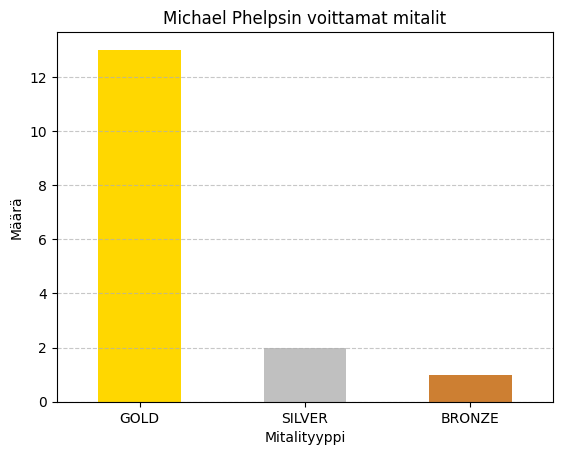

      athlete_full_name medal_type                 event_title     slug_game
20512    Michael PHELPS       GOLD  200m individual medley men      rio-2016
20861    Michael PHELPS       GOLD          200m butterfly men      rio-2016
21272    Michael PHELPS     SILVER          100m butterfly men      rio-2016
25737    Michael PHELPS       GOLD          100m butterfly men   london-2012
26273    Michael PHELPS       GOLD  200m individual medley men   london-2012
26645    Michael PHELPS     SILVER          200m butterfly men   london-2012
42289    Michael PHELPS       GOLD  200m individual medley men  beijing-2008
42564    Michael PHELPS       GOLD          100m butterfly men  beijing-2008
43189    Michael PHELPS       GOLD          200m butterfly men  beijing-2008
43379    Michael PHELPS       GOLD  400m individual medley men  beijing-2008
43408    Michael PHELPS       GOLD          200m freestyle men  beijing-2008
49546    Michael PHELPS       GOLD          200m butterfly men   athens-2004

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Etsitään Phelpsin mitalit ja poistetaan NaN-arvot 'medal_type' -sarakkeesta
phelps_medals = data[data['athlete_full_name'].str.contains('Michael Phelps', case=False, na=False)]
phelps_medals = phelps_medals.dropna(subset=['medal_type'])

# Lasketaan mitalit (Kulta, Hopea, Pronssi)
medal_counts = phelps_medals['medal_type'].value_counts()

# Piirretään pylväskaavio
medal_counts.plot(kind='bar', color=['gold', 'silver', '#cd7f32'])
plt.title('Michael Phelpsin voittamat mitalit')
plt.xlabel('Mitalityyppi')
plt.ylabel('Määrä')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tulostetaan Phelpsin mitalit
print(phelps_medals[['athlete_full_name', 'medal_type', 'event_title', 'slug_game']])


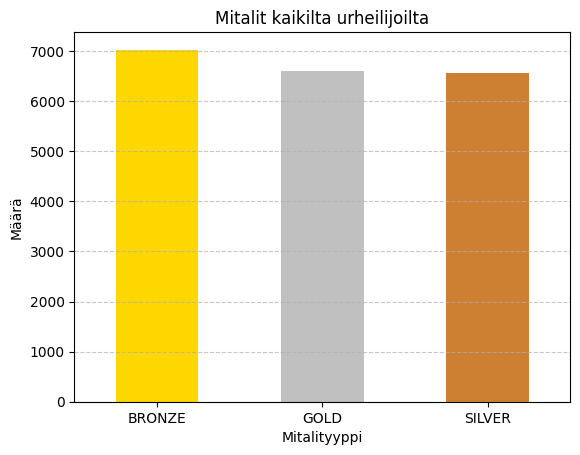

Eniten mitaleja voittaneet urheilijat:
athlete_full_name
Michael PHELPS       16
Larisa LATYNINA      14
Nikolay ANDRIANOV    12
Ireen WÜST           10
Boris SHAKHLIN       10
Marit BJOERGEN       10
Alexei NEMOV         10
Takashi ONO          10
Vitaly SCHERBO        9
Sawao KATO            9
Name: medal_type, dtype: int64


In [53]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Poistetaan NaN-arvot 'medal_type' -sarakkeesta
data_clean = data.dropna(subset=['medal_type'])

# Lasketaan mitalit (Kulta, Hopea, Pronssi) kaikkien urheilijoiden osalta
medal_counts = data_clean['medal_type'].value_counts()

# Piirretään pylväskaavio
medal_counts.plot(kind='bar', color=['gold', 'silver', '#cd7f32'])
plt.title('Mitalit kaikilta urheilijoilta')
plt.xlabel('Mitalityyppi')
plt.ylabel('Määrä')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Tulostetaan eniten mitaleja voittaneet urheilijat
top_athletes = data_clean.groupby('athlete_full_name')['medal_type'].count().sort_values(ascending=False)
print("Eniten mitaleja voittaneet urheilijat:")
print(top_athletes.head(10))


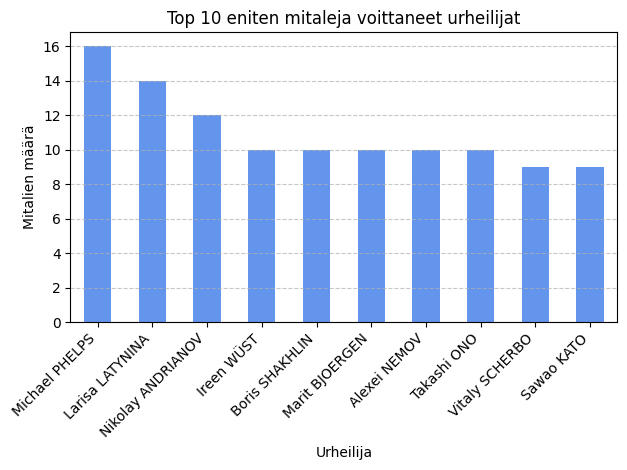

Top 10 eniten mitaleja voittaneet urheilijat:
athlete_full_name
Michael PHELPS       16
Larisa LATYNINA      14
Nikolay ANDRIANOV    12
Ireen WÜST           10
Boris SHAKHLIN       10
Marit BJOERGEN       10
Alexei NEMOV         10
Takashi ONO          10
Vitaly SCHERBO        9
Sawao KATO            9
Name: medal_type, dtype: int64


In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Poistetaan NaN-arvot 'medal_type' -sarakkeesta
data_clean = data.dropna(subset=['medal_type'])

# Lasketaan, kuinka monta mitalia kullakin urheilijalla on
athlete_medals = data_clean.groupby('athlete_full_name')['medal_type'].count().sort_values(ascending=False)

# Valitaan top 10 urheilijaa, joilla on eniten mitaleja
top_athletes = athlete_medals.head(10)

# Piirretään pylväskaavio
top_athletes.plot(kind='bar', color='cornflowerblue')
plt.title('Top 10 eniten mitaleja voittaneet urheilijat')
plt.xlabel('Urheilija')
plt.ylabel('Mitalien määrä')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Varmistaa, että otsikot eivät mene päällekkäin
plt.show()

# Tulostetaan top 10 eniten mitaleja voittaneet urheilijat
print("Top 10 eniten mitaleja voittaneet urheilijat:")
print(top_athletes)


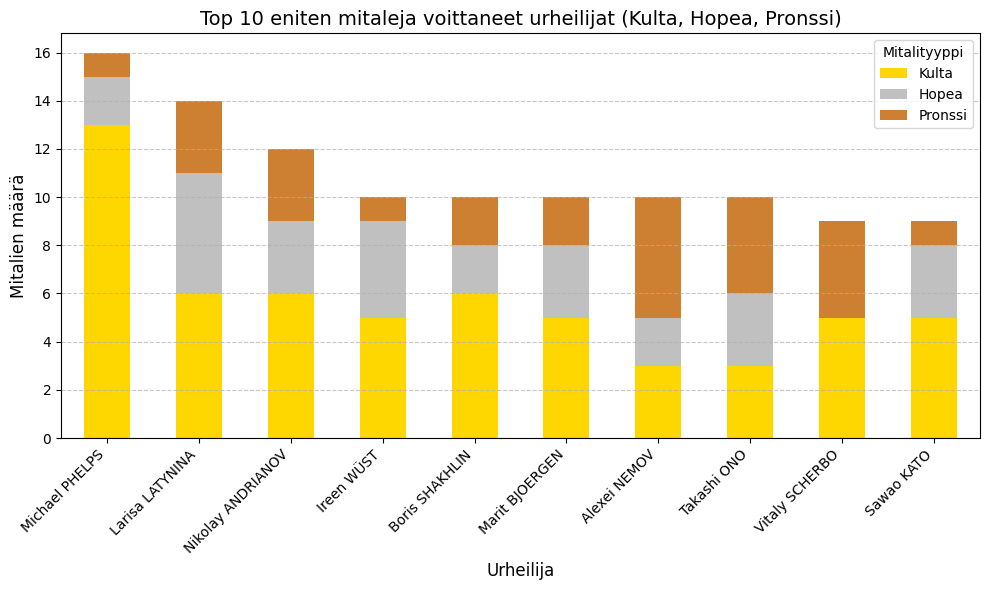

Top 10 eniten mitaleja voittaneet urheilijat:
medal_type         GOLD  SILVER  BRONZE
athlete_full_name                      
Michael PHELPS       13       2       1
Larisa LATYNINA       6       5       3
Nikolay ANDRIANOV     6       3       3
Ireen WÜST            5       4       1
Boris SHAKHLIN        6       2       2
Marit BJOERGEN        5       3       2
Alexei NEMOV          3       2       5
Takashi ONO           3       3       4
Vitaly SCHERBO        5       0       4
Sawao KATO            5       3       1


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Ladataan tiedosto
data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_results.csv')

# Poistetaan NaN-arvot 'medal_type' -sarakkeesta
data_clean = data.dropna(subset=['medal_type'])

# Lasketaan mitalit urheilijoille ja mitalityypeittäin
athlete_medals = data_clean.groupby(['athlete_full_name', 'medal_type']).size().unstack(fill_value=0)

# Varmistetaan, että kaikki mitalityypit ovat mukana (kulta, hopea, pronssi)
athlete_medals = athlete_medals[['GOLD', 'SILVER', 'BRONZE']]  # Oikea järjestys

# Valitaan top 10 urheilijaa eniten mitaleja voittaneista
top_athletes = athlete_medals.sum(axis=1).sort_values(ascending=False).head(10)

# Valitaan top 10 urheilijan mitalityypit
top_athletes_medals = athlete_medals.loc[top_athletes.index]

# Piirretään stacked bar chart
top_athletes_medals.plot(kind='bar', stacked=True, figsize=(10, 6), color=['gold', 'silver', '#cd7f32'])

# Lisää otsikot ja säädöt
plt.title('Top 10 eniten mitaleja voittaneet urheilijat (Kulta, Hopea, Pronssi)', fontsize=14)
plt.xlabel('Urheilija', fontsize=12)
plt.ylabel('Mitalien määrä', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Mitalityyppi', labels=['Kulta', 'Hopea', 'Pronssi'])
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Näytetään kaavio
plt.show()

# Tulostetaan top 10 eniten mitaleja voittaneet urheilijat
print("Top 10 eniten mitaleja voittaneet urheilijat:")
print(top_athletes_medals)


In [8]:
import pandas as pd

athletes_data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_athletes.csv')
print(athletes_data.columns)


Index(['athlete_url', 'athlete_full_name', 'games_participations',
       'first_game', 'athlete_year_birth', 'athlete_medals', 'bio'],
      dtype='object')


In [10]:
import pandas as pd

# Ladataan olympic_athletes.csv
athletes_data = pd.read_csv(r'C:/Users/Samul/Downloads/archive/olympic_athletes.csv')

# Tarkistetaan, että 'first_game' ei sisällä NaN-arvoja
athletes_clean = athletes_data.dropna(subset=['first_game'])

# Luodaan vuosi-sarake 'first_game':sta
# Oletetaan, että 'first_game' sisältää vuosiluvun (esim. "2008 Beijing")
athletes_clean['year'] = athletes_clean['first_game'].str.extract(r'(\d{4})').astype(int)

# Lasketaan ainutlaatuiset urheilijat per vuosi
athlete_counts_per_year = (
    athletes_clean.groupby('year')['athlete_full_name']
    .nunique()
    .reset_index(name='athlete_count')  # Uusi sarake urheilijamäärälle
    .sort_values(by='year')  # Järjestetään vuodet
)

# Näytetään tulokset
print("Urheilijamäärät per vuosi:")
print(athlete_counts_per_year)

# Tallennetaan tulokset CSV-tiedostoon tarvittaessa
athlete_counts_per_year.to_csv('athlete_counts_per_year.csv', index=False)


Urheilijamäärät per vuosi:
    year  athlete_count
0   1896            111
1   1900            345
2   1904            344
3   1908            749
4   1912            831
5   1920            835
6   1924           1047
7   1928            814
8   1932            686
9   1936           1730
10  1948           1893
11  1952           2067
12  1956           1448
13  1960           2351
14  1964           2282
15  1968           2607
16  1972           2881
17  1976           2688
18  1980           2340
19  1984           3855
20  1988           4373
21  1992           4840
22  1994            561
23  1996           3848
24  1998            833
25  2000           3738
26  2002            926
27  2004           3631
28  2006           1002
29  2008           3932
30  2010           1023
31  2012           3903
32  2014           1157
33  2016           4105
34  2018           1075
35  2020           3831
36  2022           1134


C:\Users\Samul\AppData\Local\Temp\ipykernel_7984\527178352.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  athletes_clean['year'] = athletes_clean['first_game'].str.extract(r'(\d{4})').astype(int)


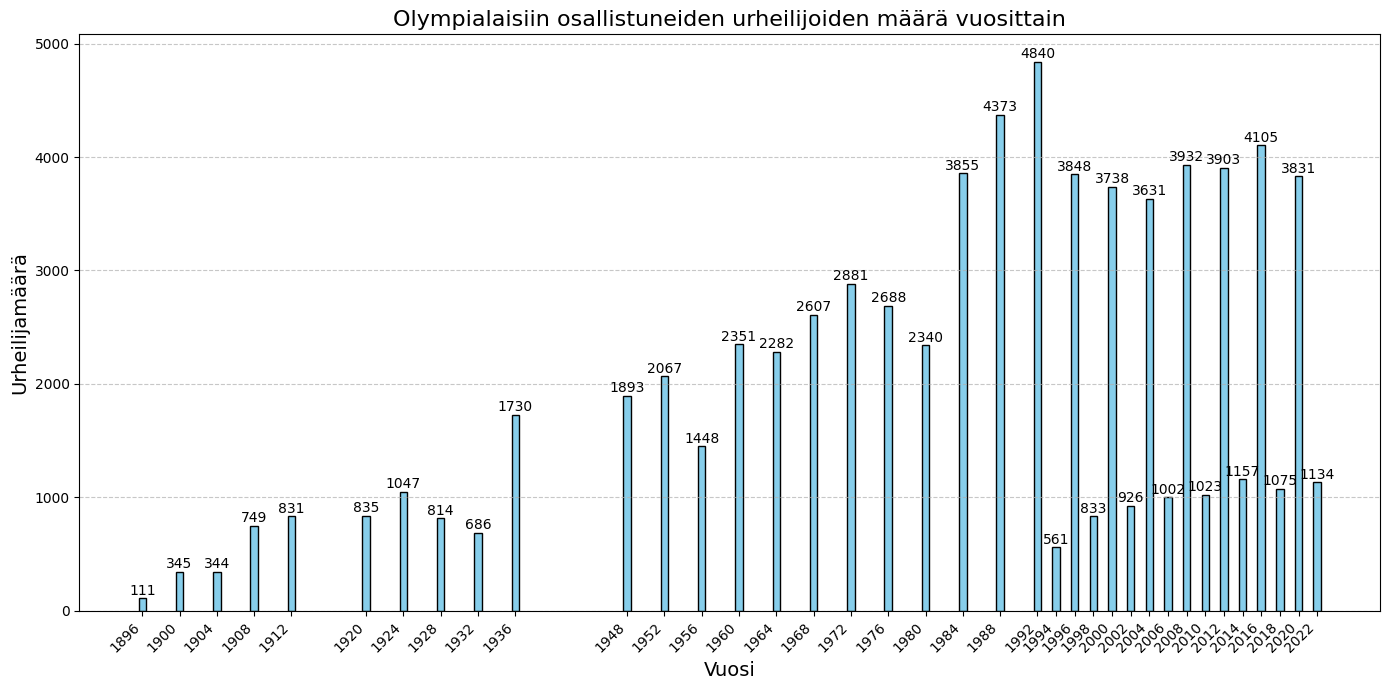

In [14]:
import matplotlib.pyplot as plt

# Visualisoidaan urheilijamäärät per vuosi
plt.figure(figsize=(14, 7))

# Pystypalkkikaavio
bars = plt.bar(
    athlete_counts_per_year['year'],
    athlete_counts_per_year['athlete_count'],
    color='skyblue', edgecolor='black'
)

# Lisätään osallistujien määrät palkkien yläpuolelle
for bar, count in zip(bars, athlete_counts_per_year['athlete_count']):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 5,  # Pieni etäisyys palkista
        str(count),
        ha='center',
        va='bottom',
        fontsize=10,
        color='black'
    )

# Merkitään vain vuodet X-akselille
plt.xticks(
    ticks=athlete_counts_per_year['year'],
    labels=athlete_counts_per_year['year'],
    rotation=45,
    ha='right'
)

# Asetetaan kaavion otsikko ja akselien nimet
plt.title('Olympialaisiin osallistuneiden urheilijoiden määrä vuosittain', fontsize=16)
plt.xlabel('Vuosi', fontsize=14)
plt.ylabel('Urheilijamäärä', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Lisää tilaa X-akselin selitteille
plt.tight_layout()

# Näytetään kaavio
plt.show()


In [16]:
import numpy as np

# Oletetaan, että athlete_counts_per_year-taulukossa on sarakkeet 'year' ja 'athlete_count'
athlete_counts = athlete_counts_per_year['athlete_count']

# Lasketaan mediaani NumPyn avulla
median_athletes = np.median(athlete_counts)

print(f"Urheilijamäärien mediaani on: {median_athletes}")


Urheilijamäärien mediaani on: 1730.0


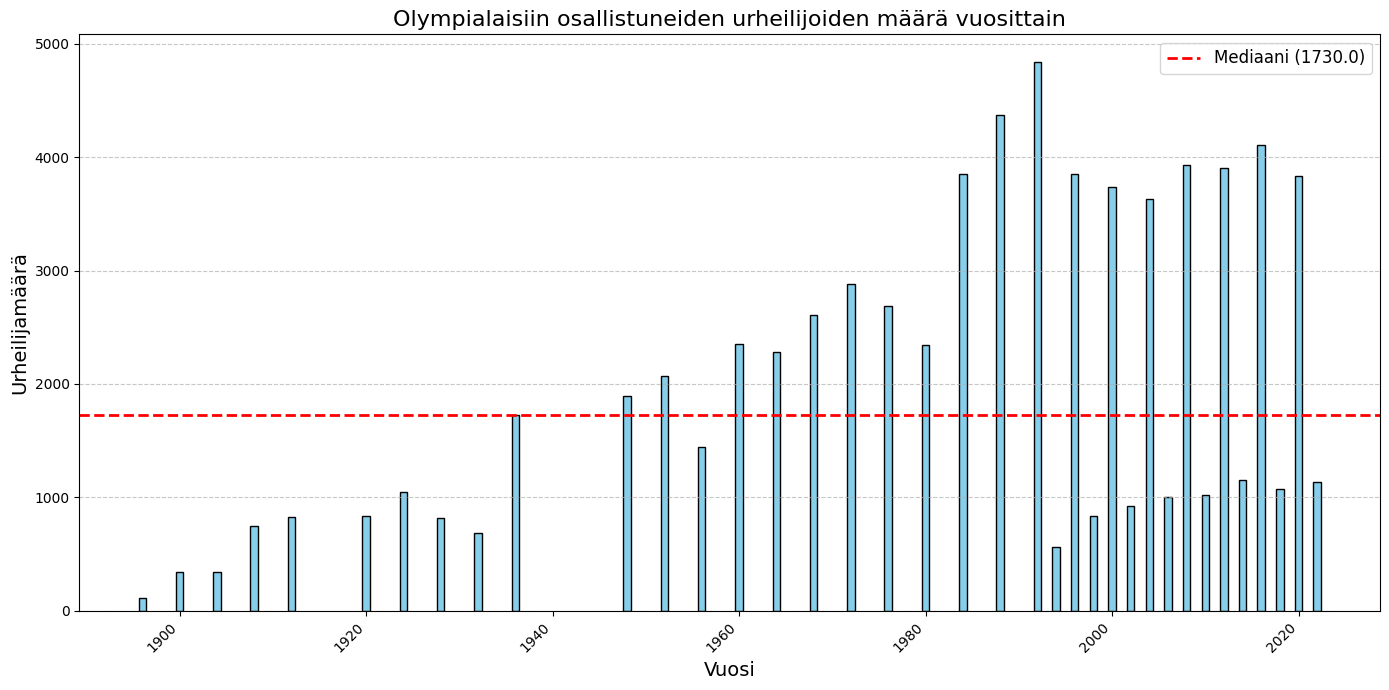

In [18]:
# Visualisoidaan urheilijamäärät per vuosi
plt.figure(figsize=(14, 7))
bars = plt.bar(
    athlete_counts_per_year['year'],
    athlete_counts_per_year['athlete_count'],
    color='skyblue', edgecolor='black'
)

# Lasketaan ja lisätään mediaaniviiva kaavioon
plt.axhline(y=median_athletes, color='red', linestyle='--', linewidth=2, label=f'Mediaani ({median_athletes})')

# Lisätään legenda ja muita elementtejä
plt.legend(fontsize=12)
plt.title('Olympialaisiin osallistuneiden urheilijoiden määrä vuosittain', fontsize=16)
plt.xlabel('Vuosi', fontsize=14)
plt.ylabel('Urheilijamäärä', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
import numpy as np

# Oletetaan, että athlete_counts_per_year-taulukossa on sarakkeet 'year' ja 'athlete_count'
athlete_counts = athlete_counts_per_year['athlete_count']

# Lasketaan keskiarvo NumPyn avulla
mean_athletes = np.mean(athlete_counts)

print(f"Urheilijoiden keskiarvo on: {mean_athletes}")


Urheilijamäärien keskiarvo on: 2049.0810810810813


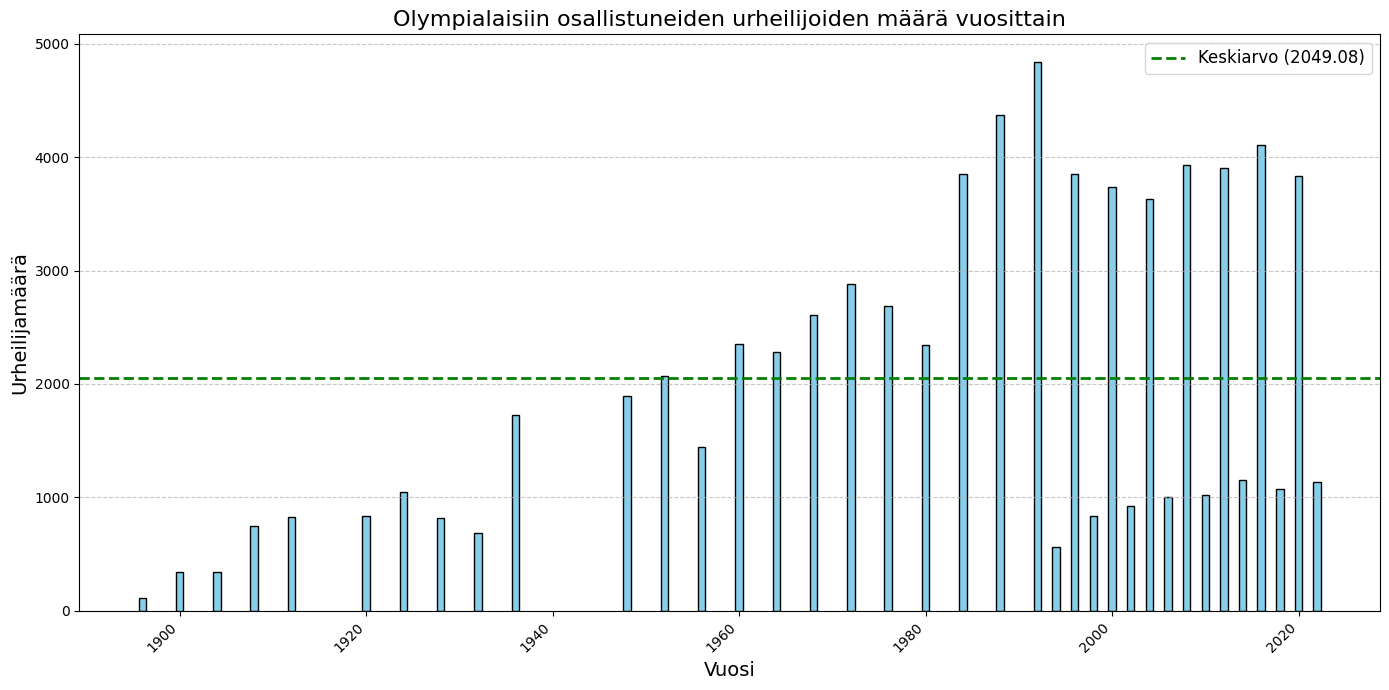

In [21]:
# Visualisoidaan urheilijamäärät per vuosi
plt.figure(figsize=(14, 7))
bars = plt.bar(
    athlete_counts_per_year['year'],
    athlete_counts_per_year['athlete_count'],
    color='skyblue', edgecolor='black'
)

# Lasketaan ja lisätään keskiarvoviiva kaavioon
plt.axhline(y=mean_athletes, color='green', linestyle='--', linewidth=2, label=f'Keskiarvo ({mean_athletes:.2f})')

# Lisätään legenda ja muita elementtejä
plt.legend(fontsize=12)
plt.title('Olympialaisiin osallistuneiden urheilijoiden määrä vuosittain', fontsize=16)
plt.xlabel('Vuosi', fontsize=14)
plt.ylabel('Urheilijamäärä', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
